In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
!pip install --upgrade seaborn

In [3]:
print("Seaborn Version:", sns.__version__)

Seaborn Version: 0.12.2


# 1) Data Preprocessing

In [4]:
#loading the data
df=pd.read_csv("/content/customer_churn_large_dataset.csv")
#df=pd.read_csv("C:\\Users\\sarit\\Downloads\\customer_churn_large_dataset.csv")
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [5]:
#printing the first 5 rows of the dataset
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
#checking the data types of the columns
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
#viewing the statistical details like mean,standard deviation, max,min, percentile values and count
df.describe(include='all')

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,100000,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Customer_1,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,28867.657797,NaN,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,NaN,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,NaN,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,NaN,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


In [9]:
#dimension of the dataset
df.shape

(100000, 9)

In [10]:
#to check the missing values in the dataset
df.isna()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [11]:
#to view the number of missing values
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

we can see there are no missing data

In [12]:
#to check the unique values in the dataset
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

From the above data we can say that, there are 1lakh customers,from 5 different locations and 24 different months lenght subscription.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


From the above data, we can observe that the CustomerID,Age,subsription_Lenght_Months,Monthy_Bill,Total_Usage_GB are numerical features and Churn is the target variable;
The only categorical variables are Gender and Location.
We can apply one-hot-encoding on the Gender and Location variables.

Before performing one-hot encoding we will do some analysis. i.e. Univariate and Bivariate analysis

# Univariant Analysis

In [14]:
gender_counts = df['Gender'].value_counts()

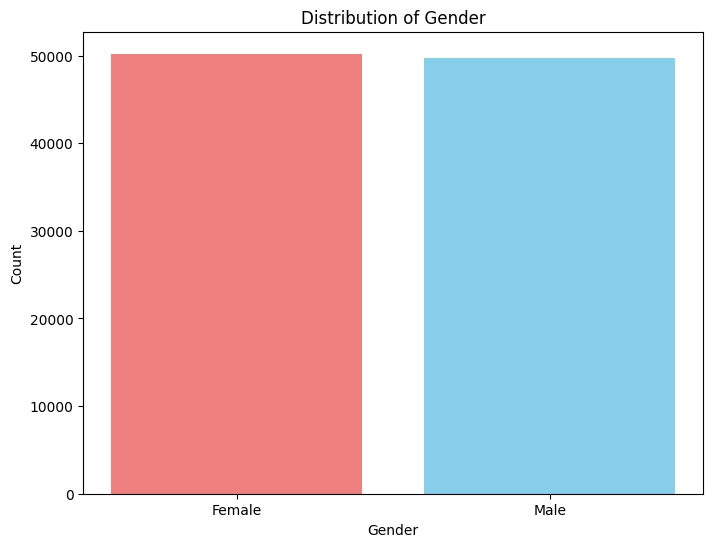

In [15]:
# Create a bar plot for the distribution of Gender using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['lightcoral','skyblue'])
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

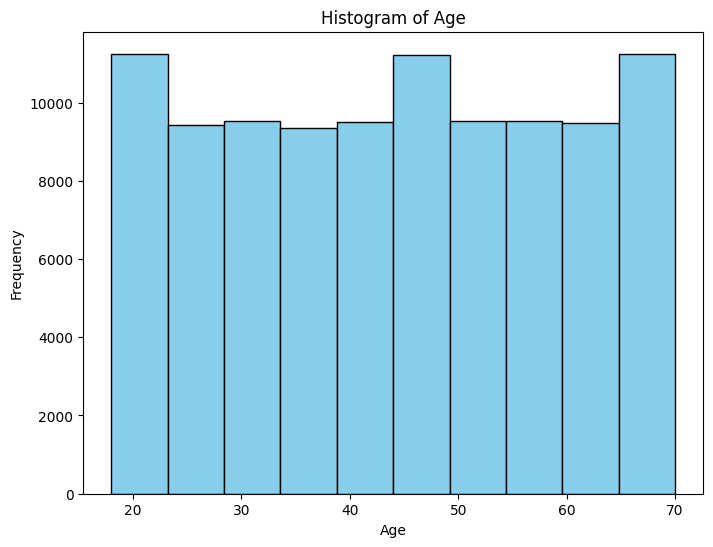

In [16]:
#Creating the histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

From the above plot we can say that the age group of subscriptions are between 15 to 20,45 to 50 and 65 to 70. we find more people of this particular age group has subscribed.

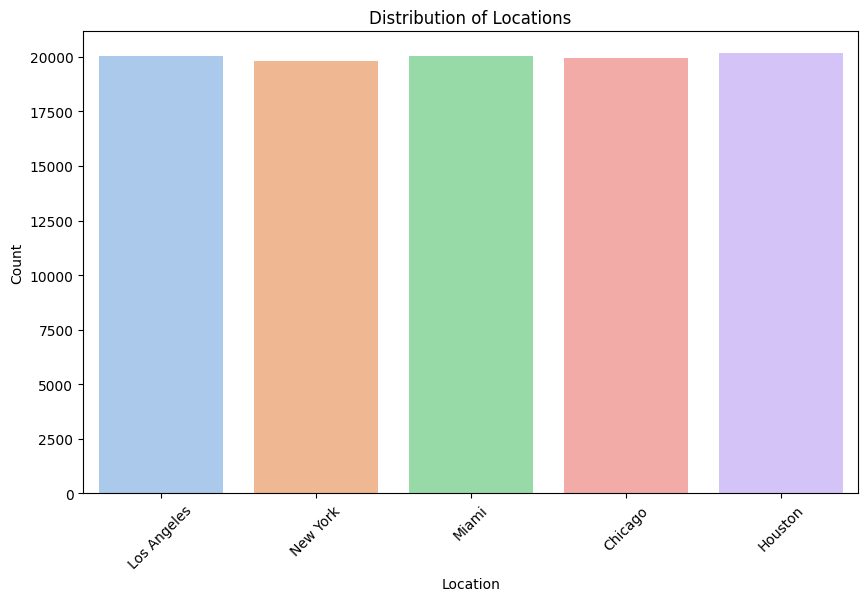

In [17]:
# Create a bar plot for "Location" column
# Create a countplot for the distribution of locations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', palette='pastel')
plt.title("Distribution of Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

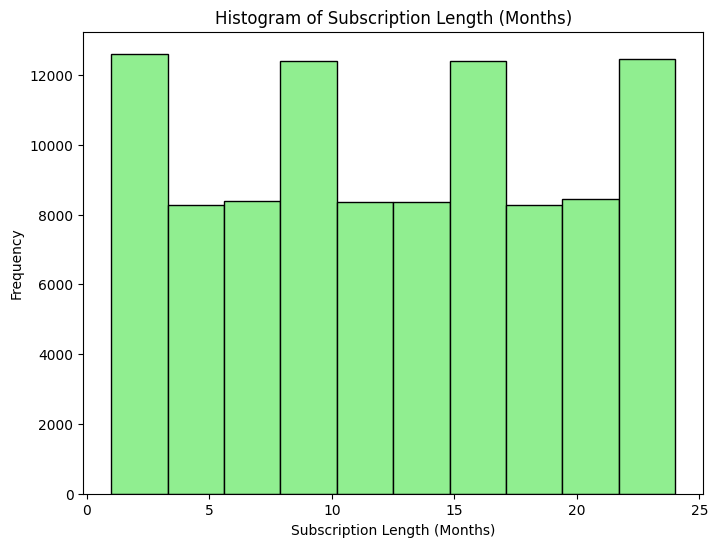

In [18]:
# Create a histogram for "Subscription_Length_Months" column
plt.figure(figsize=(8, 6))
plt.hist(df['Subscription_Length_Months'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Histogram of Subscription Length (Months)")
plt.xlabel("Subscription Length (Months)")
plt.ylabel("Frequency")
plt.show()

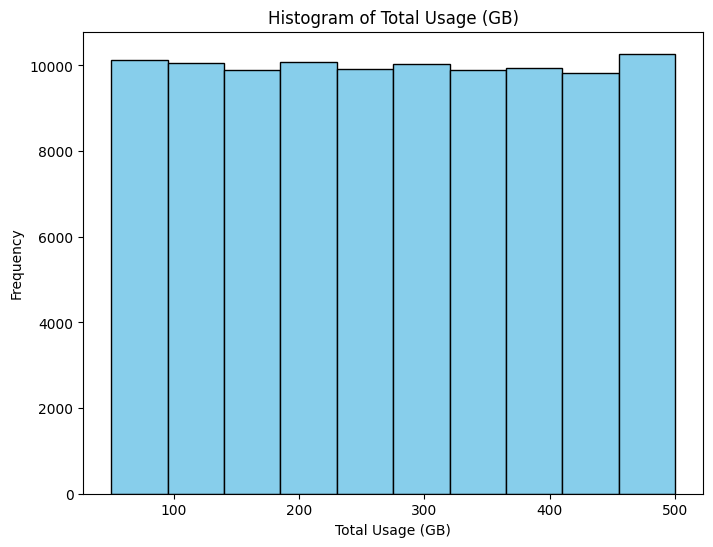

In [19]:
# Create a histogram for "Total_Usage_GB"
plt.figure(figsize=(8, 6))
plt.hist(df['Total_Usage_GB'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Usage (GB)")
plt.xlabel("Total Usage (GB)")
plt.ylabel("Frequency")
plt.show()

# Bivariante Analysis

Bivariante analysis is used to analyse the relationship between the two columns.

### Gender v/s Target variable(Churn)

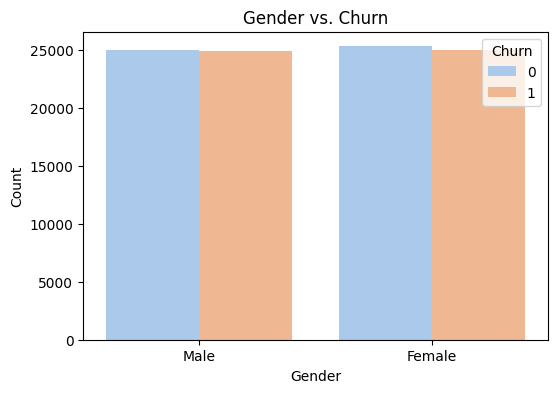

In [20]:
# Create a stacked bar plot for Gender vs. Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Churn', data=df, palette='pastel')
plt.title("Gender vs. Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

### Age v/s Monthly_Bill

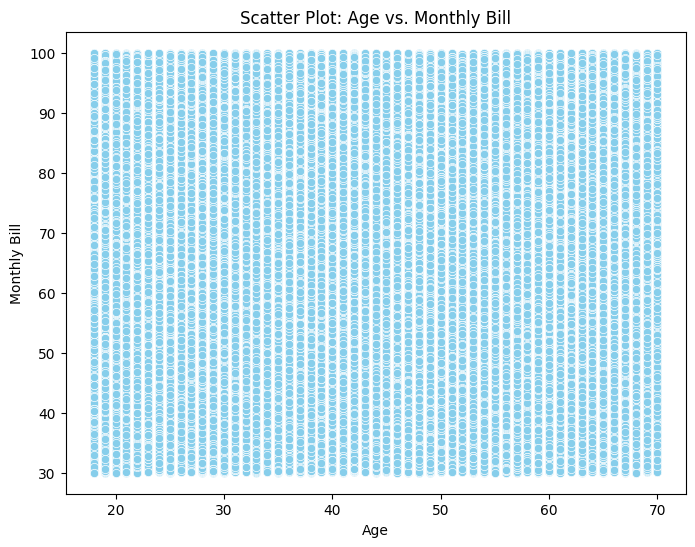

In [21]:
# Create a scatter plot for Age vs. Monthly_Bill
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Monthly_Bill', data=df, color='skyblue')
plt.title("Scatter Plot: Age vs. Monthly Bill")
plt.xlabel("Age")
plt.ylabel("Monthly Bill")
plt.show()

###Location v/s Churn

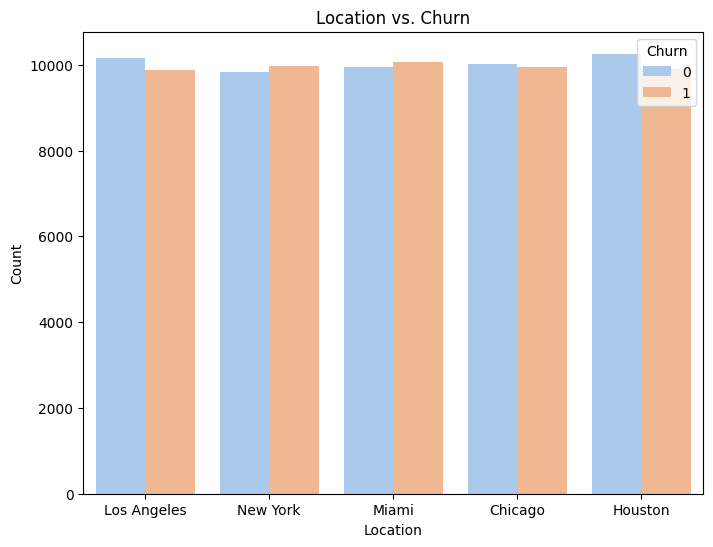

In [22]:
#location and target variable
# Create a stacked bar plot for Location vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Location', hue='Churn', data=df, palette='pastel')
plt.title("Location vs. Churn")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

### Age v/s Gender

<Axes: xlabel='Gender', ylabel='Age'>

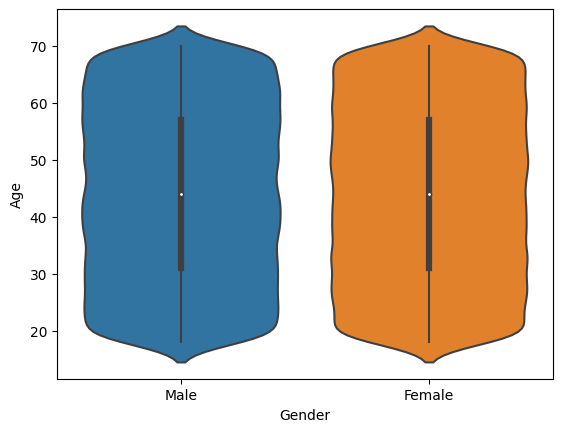

In [23]:
#To view the distribution of categorical and numerical variables(i.e. Gender and Age)
sns.violinplot(x=df['Gender'], y=df['Age'], data=df)

### Location v/s Subscription_Length_Months

<Axes: xlabel='Location', ylabel='Subscription_Length_Months'>

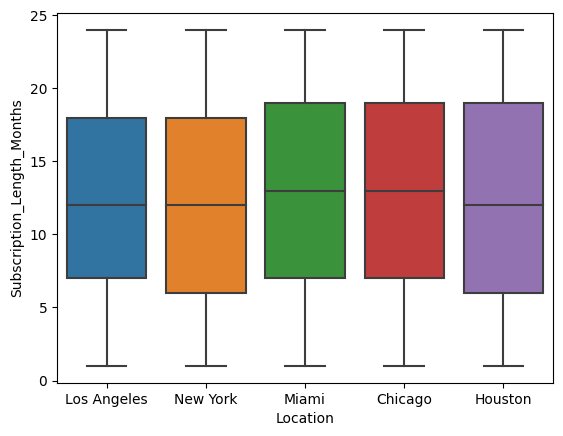

In [24]:
#the same way for Location and Subscription length months
sns.boxplot(x=df['Location'], y=df['Subscription_Length_Months'], data=df)

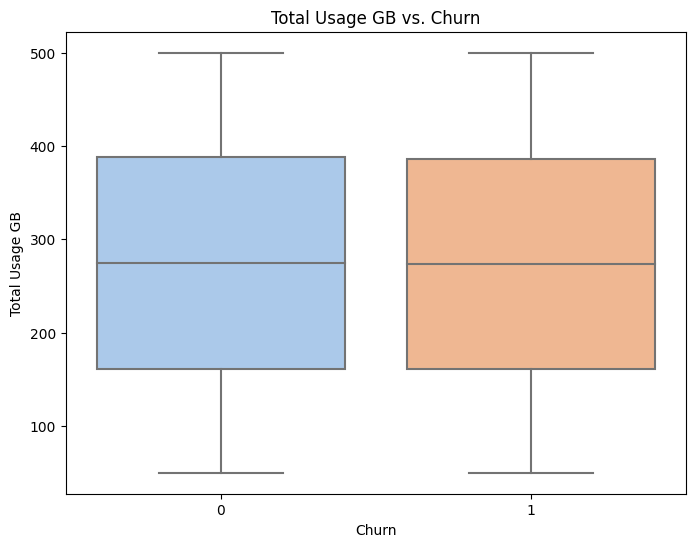

In [25]:
#Box plot for Total_Usage_GB and Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total_Usage_GB', data=df, palette='pastel')
plt.title("Total Usage GB vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Total Usage GB")
plt.show()

##One-hot Encoding

In [26]:
#performing one-hot encoding on Gender and Location variables
df=pd.get_dummies(df,columns=['Gender','Location'],prefix=['IsGender','IsLocation'])

In [27]:
df.head(5)

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,IsGender_Female,IsGender_Male,IsLocation_Chicago,IsLocation_Houston,IsLocation_Los Angeles,IsLocation_Miami,IsLocation_New York
0,1,Customer_1,63,17,73.36,236,0,0,1,0,0,1,0,0
1,2,Customer_2,62,1,48.76,172,0,1,0,0,0,0,0,1
2,3,Customer_3,24,5,85.47,460,0,1,0,0,0,1,0,0
3,4,Customer_4,36,3,97.94,297,1,1,0,0,0,0,1,0
4,5,Customer_5,46,19,58.14,266,0,1,0,0,0,0,1,0


In [28]:
#to check the values of customer churn
df['Churn']

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

We can see that there are two values of the customer churn target variable, i.e. 0 and 1

##Detecting Outliers

In [29]:
#sorting values in descending order
df['Churn'].sort_values(ascending = False)

50000    1
55523    1
55457    1
55459    1
55460    1
        ..
58588    0
20565    0
58591    0
58592    0
0        0
Name: Churn, Length: 100000, dtype: int64

As we can see the values are 1 and 0. it means the sorting operation will work correctly.

## Location(Los Angeles) v/s Churn

Now lets check the churned customers in the location "Los Angeles"

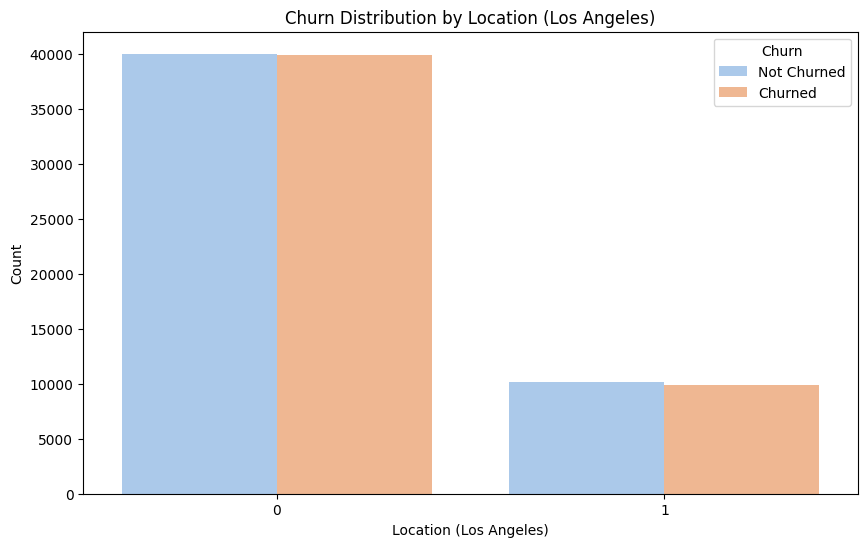

In [30]:
#To plot the distribution between Los Angeles location and target variable churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IsLocation_Los Angeles', hue='Churn', palette='pastel')
plt.title("Churn Distribution by Location (Los Angeles)")
plt.xlabel("Location (Los Angeles)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])
plt.show()

The same way lets check the total number of GB usage in the Location "Los Angeles"

##Location(Los Angeles) v/s Total_Usage_GB

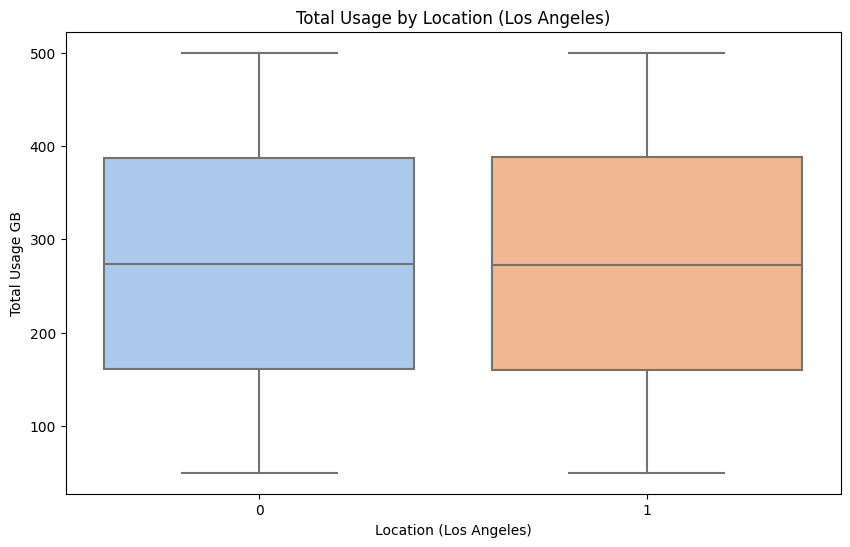

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsLocation_Los Angeles', y='Total_Usage_GB', data=df, palette='pastel')
plt.title("Total Usage by Location (Los Angeles)")
plt.xlabel("Location (Los Angeles)")
plt.ylabel("Total Usage GB")
plt.show()

In [55]:
print(df.columns)

Index(['CustomerID', 'Name', 'Age', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'IsGender_Female',
       'IsGender_Male', 'IsLocation_Chicago', 'IsLocation_Houston',
       'IsLocation_Los Angeles', 'IsLocation_Miami', 'IsLocation_New York',
       'Avg_Month_GB_Usage', 'Customer_Tenure', 'Total_Monthly_Charges',
       'Age_group_Middle-aged', 'Age_group_Senior'],
      dtype='object')


In [66]:
#dropping the unnecessary columns
df = df.drop(columns=['Name'])

We have done feature encoding and Analysis(univariate and Bivariate). Next, we ae going to split the data into train and test data.

## Data Spliting (Train and Test)

In [85]:
# Defining feature matrix (X) and target variable (y)
X = df.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df['Churn']  # Target variable ('Churn')

# Spliting the data into a training set (e.g., 80%) and a testing set (e.g., 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 2)Feature Engineering

In [68]:
#Now we are going to create a new variable Average monthly usage using the total usage and subscription lenght months
df['Avg_Month_GB_Usage']=df['Total_Usage_GB']/df['Subscription_Length_Months']

# Also creating anothe variable called Customer Tenure
df['Customer_Tenure'] = df['Age'] - df['Subscription_Length_Months']

# To Calculate Total Monthly Charges we are creating a new variable
df['Total_Monthly_Charges'] = df['Monthly_Bill'] * df['Subscription_Length_Months']

In [69]:
df.head(5)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,IsGender_Female,IsGender_Male,IsLocation_Chicago,IsLocation_Houston,IsLocation_Los Angeles,IsLocation_Miami,IsLocation_New York,Avg_Month_GB_Usage,Customer_Tenure,Total_Monthly_Charges,Age_group_Middle-aged,Age_group_Senior
0,1,1.241670,17,0.410606,-0.294289,0,0,1,0,0,1,0,0,-0.017311,-15.758330,6.980302,0,1
1,2,1.176226,1,-0.805374,-0.784852,0,1,0,0,0,0,0,1,-0.784852,0.176226,-0.805374,0,1
2,3,-1.310651,5,1.009204,1.422681,0,1,0,0,0,1,0,0,0.284536,-6.310651,5.046022,0,0
3,4,-0.525321,3,1.625597,0.173279,1,1,0,0,0,0,1,0,0.057760,-3.525321,4.876792,1,0
4,5,0.129120,19,-0.341720,-0.064338,0,1,0,0,0,0,1,0,-0.003386,-18.870880,-6.492678,1,0


Here we can see that the new feature Avg_Monthly_GB_Usage is been added to the dataset. the average mothly usage of gb is been calculated using the total usage of gb and monthly subscription lenght.

Also, the customer tenure is calculated using the monthly subscription and age of the customer.We can see that feature is included as well.

Next, we can see the total monthly charges of the customer which is taken as per the monthly subscription and monthly bill.

###Creating Age Group Feature

In [70]:
#first we have to define the age limits in a list
limit = [18, 30, 50, 100]

#defining the age group names
age_name=['Young','Middle-aged','Senior']

#assignig those values to age group feature
df['Age_group']=pd.cut(df['Age'], bins=limit, labels=age_name)

In [71]:
df.head(5)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,IsGender_Female,IsGender_Male,IsLocation_Chicago,IsLocation_Houston,IsLocation_Los Angeles,IsLocation_Miami,IsLocation_New York,Avg_Month_GB_Usage,Customer_Tenure,Total_Monthly_Charges,Age_group_Middle-aged,Age_group_Senior,Age_group
0,1,1.241670,17,0.410606,-0.294289,0,0,1,0,0,1,0,0,-0.017311,-15.758330,6.980302,0,1,NaN
1,2,1.176226,1,-0.805374,-0.784852,0,1,0,0,0,0,0,1,-0.784852,0.176226,-0.805374,0,1,NaN
2,3,-1.310651,5,1.009204,1.422681,0,1,0,0,0,1,0,0,0.284536,-6.310651,5.046022,0,0,NaN
3,4,-0.525321,3,1.625597,0.173279,1,1,0,0,0,0,1,0,0.057760,-3.525321,4.876792,1,0,NaN
4,5,0.129120,19,-0.341720,-0.064338,0,1,0,0,0,0,1,0,-0.003386,-18.870880,-6.492678,1,0,NaN


Now, we are going to create one-hot encoding for the New feature Age group

In [72]:
#One hot encode Age group feature
df = pd.get_dummies(df, columns=['Age_group'], drop_first=True)

##Analysis of Correlation

<Axes: >

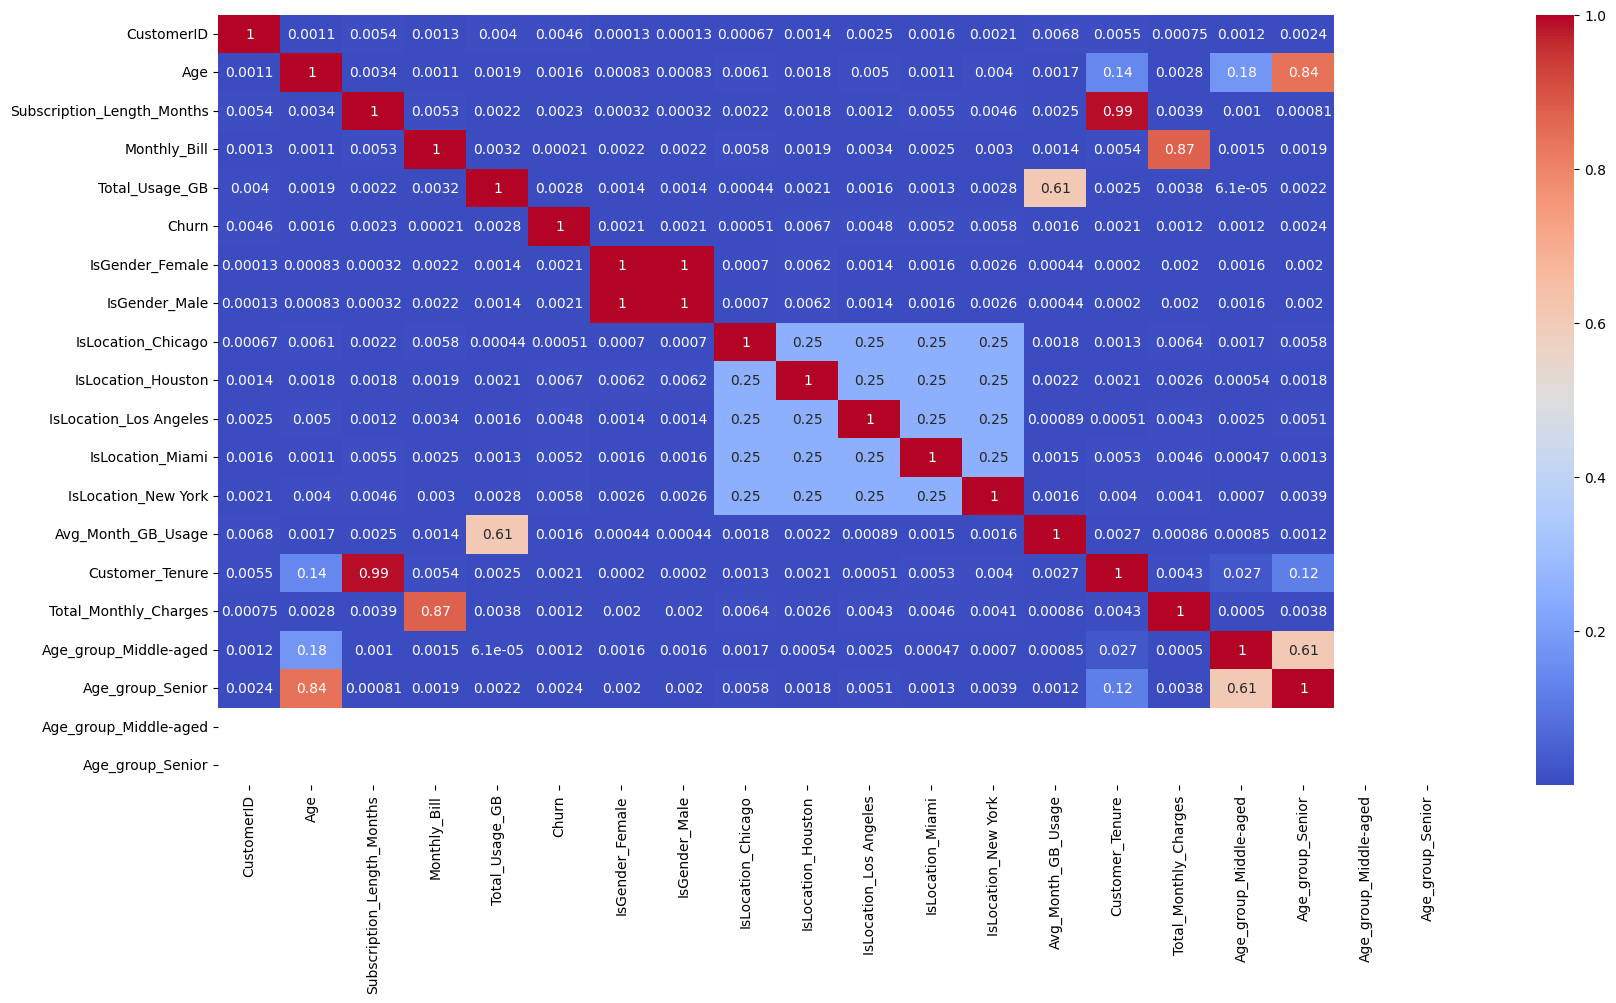

In [73]:
# Lets view correlation graph after one hot encoding
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can observe that the total monthly charges is not having correlation with average monthly gb usage.

Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
feature_scaler=StandardScaler()
#Here we are choosing the numerical features (Age,Monthly_Bill,Total_Usage_GB) for Standardization
#Fit and transform the scaler on the training data
X_train[['Age', 'Monthly_Bill', 'Total_Usage_GB']]=feature_scaler.fit_transform(X_train[['Age', 'Monthly_Bill', 'Total_Usage_GB']])

#Fit and transform the scaler on the testing data
X_test[['Age', 'Monthly_Bill', 'Total_Usage_GB']] = feature_scaler.fit_transform(X_test[['Age', 'Monthly_Bill', 'Total_Usage_GB']])

In [76]:
X_train

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,IsGender_Female,IsGender_Male,IsLocation_Chicago,IsLocation_Houston,IsLocation_Los Angeles,IsLocation_Miami,IsLocation_New York,Avg_Month_GB_Usage,Customer_Tenure,Total_Monthly_Charges,Age_group_Middle-aged,Age_group_Senior
75220,75221,0.653447,5,0.960255,-0.533774,1,0,0,0,0,0,1,41.000000,49,422.50,0,1
48955,48956,-1.048276,24,0.839624,-0.273257,0,1,0,0,0,0,1,9.958333,4,1969.44,0,0
44966,44967,0.849799,12,-0.632174,-1.629476,0,1,1,0,0,0,0,5.166667,45,627.48,0,1
13568,13569,-1.637334,19,-1.607109,-0.778966,0,1,0,1,0,0,0,9.105263,0,618.83,0,0
92727,92728,0.784348,8,-1.560142,0.301412,1,0,0,0,0,1,0,39.250000,48,268.16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,6266,-0.590120,21,0.111388,-0.303906,0,1,0,0,0,1,0,11.190476,14,1413.93,1,0
54886,54887,0.784348,13,1.004750,0.554266,0,1,1,0,0,0,0,26.692308,43,1110.20,0,1
76820,76821,1.635210,2,0.551889,0.355047,0,1,0,1,0,0,0,160.500000,67,152.48,0,1
860,861,0.718898,12,1.192123,0.309074,0,1,1,0,0,0,0,26.250000,43,1070.28,0,1


From the above data, we can observe that the Age,Monthly_Bill and Total_Usage_GB is been updated after feature scaling.

#3) Model Building

As we have alaready splitted the dataset into train and test data. Now we are going to create a machine learning model using Logistic regression and Random forest.

Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [91]:
# Creating a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

In [92]:
# Train the model on the training dataset
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

##Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [99]:
# Defining hyperparameters to tune (e.g., regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [100]:
# Performing the hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [102]:
# Getting the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001}


##Cross Validation

In [103]:
# Evaluating the best model using cross-validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

In [104]:
# Printing the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.50175   0.50175   0.50175   0.5018125 0.5018125]


##Training the Model

In [105]:
# Training the best model on the full training dataset
best_model.fit(X_train, y_train)

LogisticRegression(C=0.001, random_state=42)

In [109]:
# Making the predictions on the test dataset
y_pred = best_model.predict(X_test)

###Model Evaluation

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
 [[10079     0]
 [ 9921     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above data we can say that,
--The accuracy is 0.50, which means that the model correctly predicted the class for 50% of the samples in the validation set.
--The precision is 0.00, which is very low. Precision measures the fraction of true positive predictions out of all positive predictions.
T--he recall is 0.00, also very low. Recall measures the fraction of true positives out of all actual positives. it means the model is missing huge number of positive cases.
--The F1-score is 0.00, which is the harmonic mean of precision and recall. It is also very low.
--The confusion matrix shows that the model correctly predicted 10,079 non-churn cases (true negatives) but didn't correctly predict any churn cases (true positives). It also predicted 9,921 non-churn cases as churn (false positives) and missed 9,921 actual churn cases (false negatives).

Because this model is not the best fit. lets try Random Forest.

#Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
# Creating a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

In [127]:
# Fit the model with training data (X_train and y_train)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [128]:
# Defining the hyperparameters to tune (e.g., number of estimators and max depth)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

In [129]:
# Performing a hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [130]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [131]:
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}


In [132]:
# Evaluate the best model using cross-validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

In [122]:
# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.503125  0.4985    0.4948125 0.508125  0.500125 ]


In [133]:
# Train the best model on the full training dataset
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

###Model Evaluation for Random FOrest

In [134]:
# Make predictions on the test dataset
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test dataset
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.49925
Precision: 0.4942288801571709
Recall: 0.40570507005342205
F1-Score: 0.4456130639357875
Confusion Matrix:
 [[5960 4119]
 [5896 4025]]


From the above data we can say that,

--The model's overall accuracy is approximately 49.93%, which means it correctly predicts the churn or non-churn status for about half of the cases.

--The precision score is around 49.42%, indicating that when the model predicts churn, it is correct about 49.42% of the time.

--The recall score is approximately 40.57%, suggesting that the model identifies about 40.57% of all actual churn cases.

--The F1-Score, which balances precision and recall, is about 44.56%.

--The Confusion matrix
True Positives (TP): 4025
True Negatives (TN): 5960
False Positives (FP): 4119
False Negatives (FN): 5896

To conclude, the model shows a balanced performance with similar counts of true positives and true negatives. However, it doesn't perform exceptionally well in terms of accuracy, precision, or recall.

In [135]:
#feature importances from the trained Random Forest model
feature_importances = random_forest_model.feature_importances_

In [137]:
# storing the names of the features (columns in your dataset)
feature_names = X_train.columns

In [138]:
# Sorting the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

In [140]:
# Rearranging the feature names based on feature importance order
sorted_feature_names = [feature_names[i] for i in sorted_indices]

In [141]:
# printing the feature importances
for i in range(len(sorted_feature_names)):
    print(f"{sorted_feature_names[i]}: {feature_importances[sorted_indices[i]]:.4f}")

CustomerID: 0.1422
Monthly_Bill: 0.1338
Total_Monthly_Charges: 0.1331
Avg_Month_GB_Usage: 0.1297
Total_Usage_GB: 0.1252
Customer_Tenure: 0.1135
Age: 0.0931
Subscription_Length_Months: 0.0563
IsLocation_Los Angeles: 0.0093
IsLocation_Chicago: 0.0092
IsLocation_Miami: 0.0091
IsLocation_Houston: 0.0090
IsGender_Female: 0.0084
IsGender_Male: 0.0084
IsLocation_New York: 0.0081
Age_group_Middle-aged: 0.0070
Age_group_Senior: 0.0045
Age_group_Middle-aged: 0.0000
Age_group_Senior: 0.0000


###Visualizing the Important Features

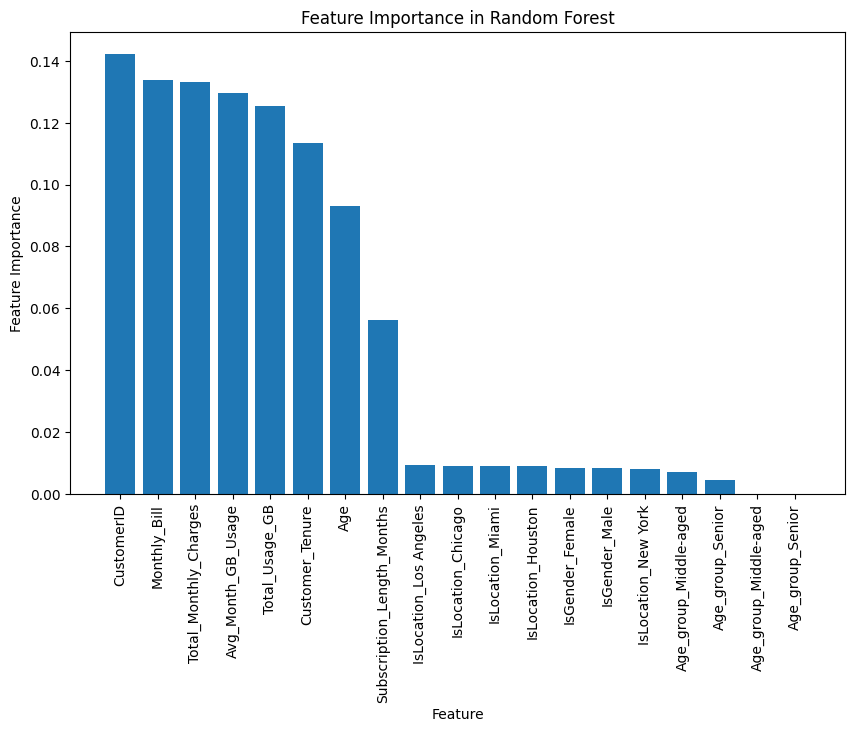

In [142]:
# Creating a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()